In [41]:
import numpy as np 
import pandas as pd
import seaborn as sns

In [42]:
df = pd.read_csv('food_coded.csv')
print(df.head)

<bound method NDFrame.head of        GPA  Gender  breakfast  calories_chicken  calories_day  calories_scone  \
0      2.4       2          1               430           NaN           315.0   
1    3.654       1          1               610           3.0           420.0   
2      3.3       1          1               720           4.0           420.0   
3      3.2       1          1               430           3.0           420.0   
4      3.5       1          1               720           2.0           420.0   
..     ...     ...        ...               ...           ...             ...   
120    3.5       1          1               610           4.0           420.0   
121      3       1          1               265           2.0           315.0   
122  3.882       1          1               720           NaN           420.0   
123      3       2          1               720           4.0           420.0   
124    3.9       1          1               430           NaN           315.0  

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125 entries, 0 to 124
Data columns (total 61 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   GPA                           123 non-null    object 
 1   Gender                        125 non-null    int64  
 2   breakfast                     125 non-null    int64  
 3   calories_chicken              125 non-null    int64  
 4   calories_day                  106 non-null    float64
 5   calories_scone                124 non-null    float64
 6   coffee                        125 non-null    int64  
 7   comfort_food                  124 non-null    object 
 8   comfort_food_reasons          124 non-null    object 
 9   comfort_food_reasons_coded    106 non-null    float64
 10  cook                          122 non-null    float64
 11  comfort_food_reasons_coded.1  125 non-null    int64  
 12  cuisine                       108 non-null    float64
 13  diet_

In [44]:
#Checking for Null Values
null_any = df.isnull().any()
print(null_any)

GPA                  True
Gender              False
breakfast           False
calories_chicken    False
calories_day         True
                    ...  
type_sports          True
veggies_day         False
vitamins            False
waffle_calories     False
weight               True
Length: 61, dtype: bool


In [45]:
#Total Null Values
null_values = [None, 'None', 'N/A', 'NaN', '', 'text', 'Unknown']
df = pd.read_csv('food_coded.csv', na_values = null_values)
df.isnull().sum()

GPA                  3
Gender               0
breakfast            0
calories_chicken     0
calories_day        19
                    ..
type_sports         26
veggies_day          0
vitamins             0
waffle_calories      0
weight               2
Length: 61, dtype: int64

<Axes: >

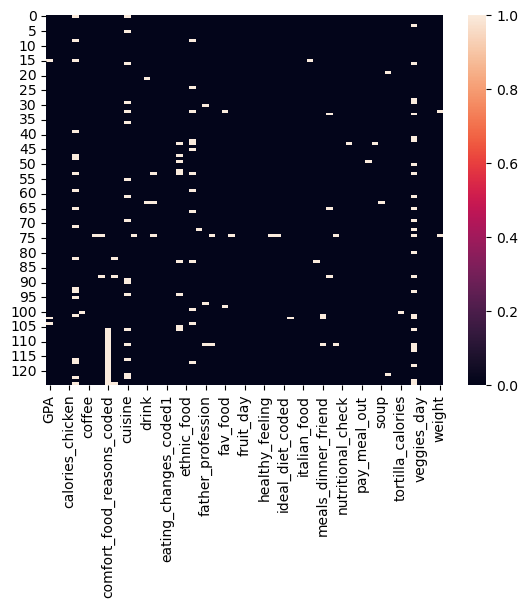

In [46]:
sns.heatmap(df.isnull())

In [47]:
df.drop_duplicates(inplace=True)

In [48]:
columns_with_null = df.columns[df.isnull().any()]
print(columns_with_null)

Index(['GPA', 'calories_day', 'calories_scone', 'comfort_food',
       'comfort_food_reasons', 'comfort_food_reasons_coded', 'cook', 'cuisine',
       'diet_current', 'drink', 'eating_changes', 'employment', 'exercise',
       'father_education', 'father_profession', 'fav_cuisine', 'fav_food',
       'food_childhood', 'healthy_meal', 'ideal_diet', 'income',
       'life_rewarding', 'marital_status', 'meals_dinner_friend',
       'mother_education', 'mother_profession', 'on_off_campus',
       'persian_food', 'self_perception_weight', 'soup', 'sports',
       'tortilla_calories', 'type_sports', 'weight'],
      dtype='object')


In [49]:
df1 = df
for col in columns_with_null:
    if df[col].dtype == 'float64' or df[col].dtype == 'int64':
        df1[col] = df1[col].fillna(df1[col].mean().round(2))

In [50]:
cols_null = df1.columns[df1.isnull().any()]
for col in cols_null:
    df1[col] = df1[col].fillna(method = "pad")

In [51]:
df1.isnull().sum()

GPA                 0
Gender              0
breakfast           0
calories_chicken    0
calories_day        0
                   ..
type_sports         0
veggies_day         0
vitamins            0
waffle_calories     0
weight              0
Length: 61, dtype: int64

In [57]:
df1.sample(5)

,GPA,Gender,breakfast,calories_chicken,calories_day,calories_scone,coffee,comfort_food,comfort_food_reasons,comfort_food_reasons_coded,...,soup,sports,thai_food,tortilla_calories,turkey_calories,type_sports,veggies_day,vitamins,waffle_calories,weight
103,3.7,1,1,610,3.0,420.0,2,"dark chocolate, terra chips, reese's cups(dark...","Anxiousness, watching TV I desire ""comfort food""",8.0,...,1.0,2.0,3,725.0,345,"When I can, rarely though play pool, darts, an...",5,1,760,130
74,2.71,2,2,265,2.0,420.0,1,"Chips, ice cream","Boredom, stress",9.0,...,1.0,2.0,3,580.0,345,baseball,4,2,760,200
44,3.2,1,1,610,4.0,420.0,2,"Potato chips, ice cream, chocolate, cookies","Stress, boredom, craving",1.0,...,1.0,1.0,5,725.0,500,Volleyball,5,1,760,170
18,3.4,1,1,720,3.0,980.0,1,"Chocolate, ice crea","Sadness, stress",3.0,...,2.0,2.0,1,1165.0,690,dancing,5,1,1315,135
79,3.9,2,1,720,3.0,420.0,2,Chips sweets popcorn,Boredom,2.0,...,1.0,1.0,5,1165.0,850,"Rowing, Running, and Cycling",4,2,1315,145


In [53]:
 df1.index[df1["GPA"] == "Personal "].tolist()

[61]

In [54]:
df1.columns[df1.isnull().any()]

Index([], dtype='object')

In [55]:
cols_num = []
for col in df1.columns:
    if df1[col].dtype == 'int64' or df1[col].dtype == 'float64':
        cols_num.append(col)

In [56]:
cols_num

['Gender',
 'breakfast',
 'calories_chicken',
 'calories_day',
 'calories_scone',
 'coffee',
 'comfort_food_reasons_coded',
 'cook',
 'comfort_food_reasons_coded.1',
 'cuisine',
 'diet_current_coded',
 'drink',
 'eating_changes_coded',
 'eating_changes_coded1',
 'eating_out',
 'employment',
 'ethnic_food',
 'exercise',
 'father_education',
 'fav_cuisine_coded',
 'fav_food',
 'fries',
 'fruit_day',
 'grade_level',
 'greek_food',
 'healthy_feeling',
 'ideal_diet_coded',
 'income',
 'indian_food',
 'italian_food',
 'life_rewarding',
 'marital_status',
 'mother_education',
 'nutritional_check',
 'on_off_campus',
 'parents_cook',
 'pay_meal_out',
 'persian_food',
 'self_perception_weight',
 'soup',
 'sports',
 'thai_food',
 'tortilla_calories',
 'turkey_calories',
 'veggies_day',
 'vitamins',
 'waffle_calories']

<Axes: >

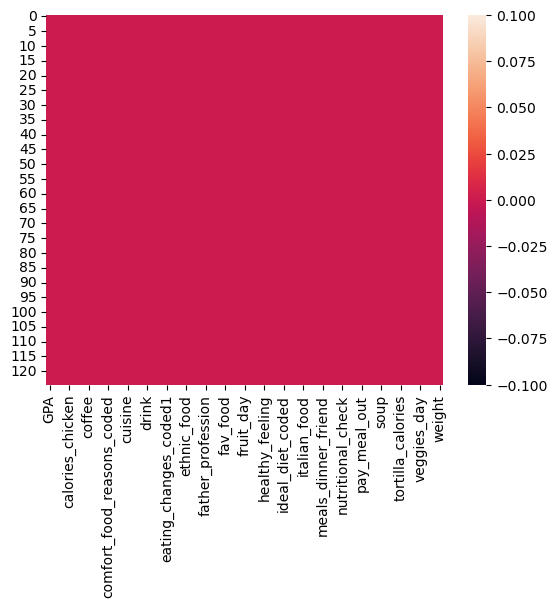

In [58]:
sns.heatmap(df.isnull())